In [1]:
import pickle as pkl
import pandas as pd

import matplotlib.pyplot as plt

# Global options
datapath = '../Data/'

# usage data

all_data = []

years = [2012, 2013, 2014, 2015, 2016]

# Subset for testing purposes - comment out in final
years = [2016]

for year in years:
    fname = datapath + 'usage_data{:}.pkl'.format(year)
    with open(fname, 'rb') as handle:   
        all_data.append(pkl.load(handle))

all_data = pd.concat(all_data)

# Take the first 1m rows
all_data = all_data.iloc[:1000000]

# All data
with open(datapath+'all_locs.pkl', 'rb') as handle:
    locations = pkl.load(handle)
    
locations = locations.set_index('id')

# Have a quick look at the dataframes
print(all_data.head())
print(locations.head())

         Start Date  StartStation Id          End Date  EndStation Id  \
0  23/08/2015 00:00              150  23/08/2015 00:25          245.0   
1  23/08/2015 00:01              150  23/08/2015 00:26          245.0   
2  23/08/2015 00:02              484  23/08/2015 00:13          522.0   
3  23/08/2015 00:03              484  23/08/2015 00:13          522.0   
4  23/08/2015 00:10              735  23/08/2015 00:20          738.0   

   Duration  
0      1500  
1      1500  
2       660  
3       600  
4       600  
                                    name        lat       lon  capacity
id                                                                     
1             River Street , Clerkenwell  51.529163 -0.109971        19
2         Phillimore Gardens, Kensington  51.499607 -0.197574        37
3   Christopher Street, Liverpool Street  51.521284 -0.084606        32
4        St. Chad's Street, King's Cross  51.530059 -0.120974        23
5          Sedding Street, Sloane Square  51.

In [2]:
# Convert to datetime format

all_data['Start Date'] = all_data['Start Date'].astype('datetime64')
all_data['End Date'] = all_data['End Date'].astype('datetime64')

print(all_data.dtypes)
print(len(all_data))

Start Date         datetime64[ns]
StartStation Id             int64
End Date           datetime64[ns]
EndStation Id             float64
Duration                    int64
dtype: object
1000000


In [3]:
print(all_data['Start Date'].dt.weekday_name.head())

0    Sunday
1    Sunday
2    Sunday
3    Sunday
4    Sunday
Name: Start Date, dtype: object


(0, 168)

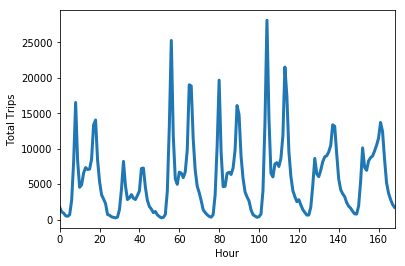

In [4]:
# Get average traffic by hour in the week
traffic = []
days = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']
for i, day in enumerate(days):
    for hour in range(24):
        traffic.append(len(all_data[(all_data['Start Date'].dt.dayofweek == i) & (all_data['Start Date'].dt.hour == hour)]))
    
traffic += traffic[:1]

plt.plot(traffic, lw=3)
plt.xlabel('Hour')
plt.ylabel('Total Trips')
plt.xlim(0, 24*7)


In [27]:
# Average traffic by station
start = all_data.groupby('StartStation Id')['Duration'].count()
end = all_data.groupby('EndStation Id')['Duration'].count()
diff = end - start
diffabs = (end - start).abs()

locations['Departures'] = start
locations['Arrivals'] = end
locations['diff'] = diff
locations['diffabs'] = diffabs
locations['priority'] = (locations['diffabs']/locations['capacity'])

locationsRanked = locations.sort_values(by='priority', ascending=False)

print(locationsRanked)


                                              name        lat       lon  \
id                                                                        
112                    Stonecutter Street, Holborn  51.515810 -0.105270   
278                      Tooley Street, Bermondsey  51.503494 -0.079621   
194                      Hop Exchange, The Borough  51.504628 -0.091774   
71                     Newgate Street , St. Paul's  51.515419 -0.098851   
64                       William IV Street, Strand  51.509462 -0.124749   
228                St. James's Square, St. James's  51.507425 -0.134621   
217              Wormwood Street, Liverpool Street  51.516155 -0.082422   
646                   Buckingham Gate, Westminster  51.498866 -0.137425   
192                           Wardour Street, Soho  51.512515 -0.133202   
251            Brushfield Street, Liverpool Street  51.518908 -0.079249   
95                     Aldersgate Street, Barbican  51.520842 -0.097340   
388                     S

(0, 168)

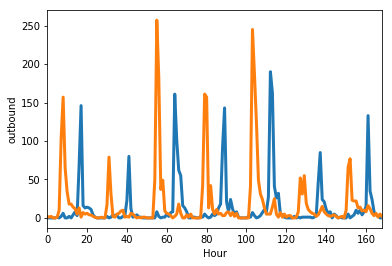

In [33]:
inbound = []
outbound = []
days = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']
for i, day in enumerate(days):
    for hour in range(24):
        inbound.append(len(all_data[(all_data['Start Date'].dt.dayofweek == i) & (all_data['Start Date'].dt.hour == hour) & (all_data['EndStation Id'] == 361)]))
        outbound.append(len(all_data[(all_data['Start Date'].dt.dayofweek == i) & (all_data['Start Date'].dt.hour == hour) & (all_data['StartStation Id'] == 361)]))
        
inbound += inbound[:1]
outbound += outbound[:1]

plt.plot(inbound, lw=3)
plt.xlabel('Hour')
plt.ylabel('Inbound')
plt.xlim(0, 24*7)

plt.plot(outbound, lw=3)
plt.xlabel('Hour')
plt.ylabel('outbound')
plt.xlim(0, 24*7)

In [34]:
with open(datapath+'station_id_to_cluster_id.pkl', 'rb') as handle:
    IDMap = pkl.load(handle)
    
with open(datapath+'clustered_locs.pkl', 'rb') as handle:
    IDName = pkl.load(handle)
    

{1: 26, 2: 52, 3: 59, 4: 54, 5: 87, 6: 62, 7: 96, 8: 96, 9: 5, 10: 5, 11: 14, 12: 14, 13: 36, 14: 54, 15: 14, 16: 14, 17: 46, 18: 27, 19: 14, 20: 33, 21: 46, 22: 46, 23: 14, 24: 89, 25: 26, 26: 104, 27: 36, 28: 9, 29: 48, 30: 48, 31: 86, 32: 1, 33: 54, 34: 52, 35: 30, 36: 52, 37: 86, 38: 86, 39: 59, 40: 48, 41: 62, 42: 63, 43: 62, 44: 116, 45: 61, 46: 98, 47: 63, 48: 48, 49: 35, 50: 97, 51: 63, 52: 6, 53: 59, 54: 62, 55: 14, 56: 86, 57: 96, 58: 105, 59: 51, 60: 48, 61: 102, 62: 33, 63: 46, 64: 46, 65: 46, 66: 33, 67: 98, 68: 26, 69: 97, 70: 108, 71: 2, 72: 106, 73: 14, 74: 35, 75: 104, 76: 92, 77: 36, 78: 46, 79: 120, 80: 46, 81: 11, 82: 108, 83: 59, 84: 14, 85: 14, 86: 20, 87: 108, 88: 32, 89: 2, 90: 15, 91: 6, 92: 48, 93: 52, 94: 33, 95: 62, 96: 108, 97: 4, 98: 1, 99: 52, 100: 107, 101: 9, 102: 63, 103: 97, 104: 122, 105: 88, 106: 96, 107: 49, 108: 46, 109: 91, 110: 106, 111: 1, 112: 120, 113: 108, 114: 122, 115: 97, 116: 39, 117: 62, 118: 59, 119: 35, 120: 10, 121: 105, 122: 6, 123:

In [66]:
# Give a clusterStartID and clusterEndID to every journey

cluster
for hour in range(24):
    
    

inbound = []
outbound = []
days = ['M', 'Tu', 'W', 'Th', 'F', 'Sa', 'Su']
for i, day in enumerate(days):
    for hour in range(24):
        inbound.append(len(all_data[(all_data['Start Date'].dt.dayofweek == i) & (all_data['Start Date'].dt.hour == hour) & (all_data['EndStation Id'] == 361)]))
        outbound.append(len(all_data[(all_data['Start Date'].dt.dayofweek == i) & (all_data['Start Date'].dt.hour == hour) & (all_data['StartStation Id'] == 361)]))
        
inbound += inbound[:1]
outbound += outbound[:1]

plt.plot(inbound, lw=3)
plt.xlabel('Hour')
plt.ylabel('Inbound')
plt.xlim(0, 24*7)

plt.plot(outbound, lw=3)
plt.xlabel('Hour')
plt.ylabel('outbound')
plt.xlim(0, 24*7)

                                              name        lat       lon  \
id                                                                        
1                       River Street , Clerkenwell  51.529163 -0.109971   
2                   Phillimore Gardens, Kensington  51.499607 -0.197574   
3             Christopher Street, Liverpool Street  51.521284 -0.084606   
4                  St. Chad's Street, King's Cross  51.530059 -0.120974   
5                    Sedding Street, Sloane Square  51.493130 -0.156876   
6                   Broadcasting House, Marylebone  51.518118 -0.144229   
7                Charlbert Street, St. John's Wood  51.534300 -0.168074   
8                      Lodge Road, St. John's Wood  51.528341 -0.170134   
9                         New Globe Walk, Bankside  51.507385 -0.096441   
10                           Park Street, Bankside  51.505974 -0.092754   
11                    Brunswick Square, Bloomsbury  51.523951 -0.122502   
12                       

"\nstartList = []\nendList = []\n\nfor ind in all_data.index:\n    #print(all_data['StartStation Id'][ind])\n    startList.append(IDMap[all_data['StartStation Id'][ind]])\n    endList.append(IDMap[all_data['EndStation Id'][ind]])\n\n\nclusterList = []\nfor ind in locations.index:\n    if ind>=782:\n        clusterList.append(-1)\n    else:\n        clusterList.append(IDMap[ind]) \n        \nfor ind2 in all_data.indexStartStation Id\n    \nlocations['clusterID'] = clusterList\n\n#print(locations)\n\nlocationsGrouped = all_data.groupby('StartStation Id')['Duration'].count()\nend = all_data.groupby('EndStation Id')['Duration'].count()\ndiff = end - start\ndiffabs = (end - start).abs()\n\nlocations['Departures'] = start\nlocations['Arrivals'] = end\nlocations['diff'] = diff\nlocations['diffabs'] = diffabs\nlocations['priority'] = (locations['diffabs']/locations['capacity'])\n\nlocationsRanked = locations.sort_values(by='priority', ascending=False)\n\nprint(locationsRanked)\n"